## Importing Necessary Libraries

In [85]:
%pip install category_encoders

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder


## Load Dataset

In [87]:
df = pd.read_csv("houserentdhaka.csv")

In [88]:
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [89]:
df.columns

Index(['Unnamed: 0', 'Location', 'Area', 'Bed', 'Bath', 'Price'], dtype='object')

In [90]:
df.dtypes

,0
Unnamed: 0,int64
Location,object
Area,object
Bed,int64
Bath,int64
Price,object


In [91]:
df.describe()

,Unnamed: 0,Bed,Bath
count,28800.000000,28800.000000,28800.000000
mean,1399.500000,2.511076,2.369653
std,959.182914,0.601353,0.756758
min,0.000000,1.000000,1.000000
25%,654.000000,2.000000,2.000000
50%,1309.000000,2.000000,2.000000
75%,1963.000000,3.000000,3.000000
max,4799.000000,6.000000,8.000000


## Null and Unique Value Check

In [92]:
df.isnull().sum()

,0
Unnamed: 0,0
Location,0
Area,0
Bed,0
Bath,0
Price,0


In [93]:
df.nunique()

,0
Unnamed: 0,4800
Location,730
Area,596
Bed,6
Bath,7
Price,223


## Data Pre-Processing

### Area and Price Checking

In [96]:
area_filter = ~df['Area'].astype(str).str.endswith(' sqft')
display(df[area_filter])
print()
price_filter = ~df['Price'].astype(str).str.endswith(' Thousand')
display(df[price_filter])

,Unnamed: 0,Location,Area,Bed,Bath,Price


,Unnamed: 0,Location,Area,Bed,Bath,Price
17,17,"Block K, Baridhara, Dhaka","3,000 sqft",4,4,1.6 Lakh
30,30,"Baridhara, Dhaka","1,524 sqft",3,3,1 Lakh
33,33,"Gulshan 1, Gulshan, Dhaka","3,500 sqft",4,4,2 Lakh
51,51,"Gulshan 2, Gulshan, Dhaka","3,000 sqft",4,4,1.5 Lakh
52,52,"Gulshan 2, Gulshan, Dhaka","3,200 sqft",4,4,1.2 Lakh
...,...,...,...,...,...,...
28728,4728,"Gulshan 1, Gulshan, Dhaka","2,150 sqft",3,3,1 Lakh
28729,4729,"Gulshan 1, Gulshan, Dhaka","2,150 sqft",3,3,1 Lakh
28730,4730,"Gulshan 1, Gulshan, Dhaka","2,150 sqft",3,3,1 Lakh
28762,4762,"Gulshan 2, Gulshan, Dhaka","3,650 sqft",4,4,1.66 Lakh


In [97]:
# Clean 'Area' column
df['Area'] = df['Area'].astype(str).str.replace(' sqft', '').str.replace(',', '').str.strip().astype(int)

# Clean 'Price' column
df['Price'] = df['Price'].astype(str).str.replace(' Thousand', '').str.strip()
# Handle 'Lakh' values and convert to numeric
df['Price'] = df['Price'].replace(r'([\d\.]+)\s*Lakh', r'\1*100000', regex=True)
df['Price'] = df['Price'].apply(eval).astype(float)

In [98]:
print(type(df['Area'][1000]))
print(type(df['Price'][1000]))

<class 'numpy.int64'>
<class 'numpy.float64'>


In [99]:
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20.0
1,1,"Farmgate, Tejgaon, Dhaka",900,2,2,20.0
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18.0
3,3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75.0
4,4,"Baridhara, Dhaka",2200,3,3,75.0


### Irrelevent Feature Drop

In [100]:
df = df.drop(columns=["Unnamed: 0"])

In [101]:
df.tail()

,Location,Area,Bed,Bath,Price
28795,"Section 2, Mirpur, Dhaka",1400,3,2,15.0
28796,"Block F, Bashundhara R-A, Dhaka",1400,3,3,25.0
28797,"RK Mission Road, Gopibag, Motijheel, Dhaka",1250,3,3,23.0
28798,"Ullan, West Rampura, Rampura, Dhaka",1900,3,3,30.0
28799,"Vatara, Badda, Dhaka",1150,3,2,15.0


## Dataset Visualization

### Histogram Plot

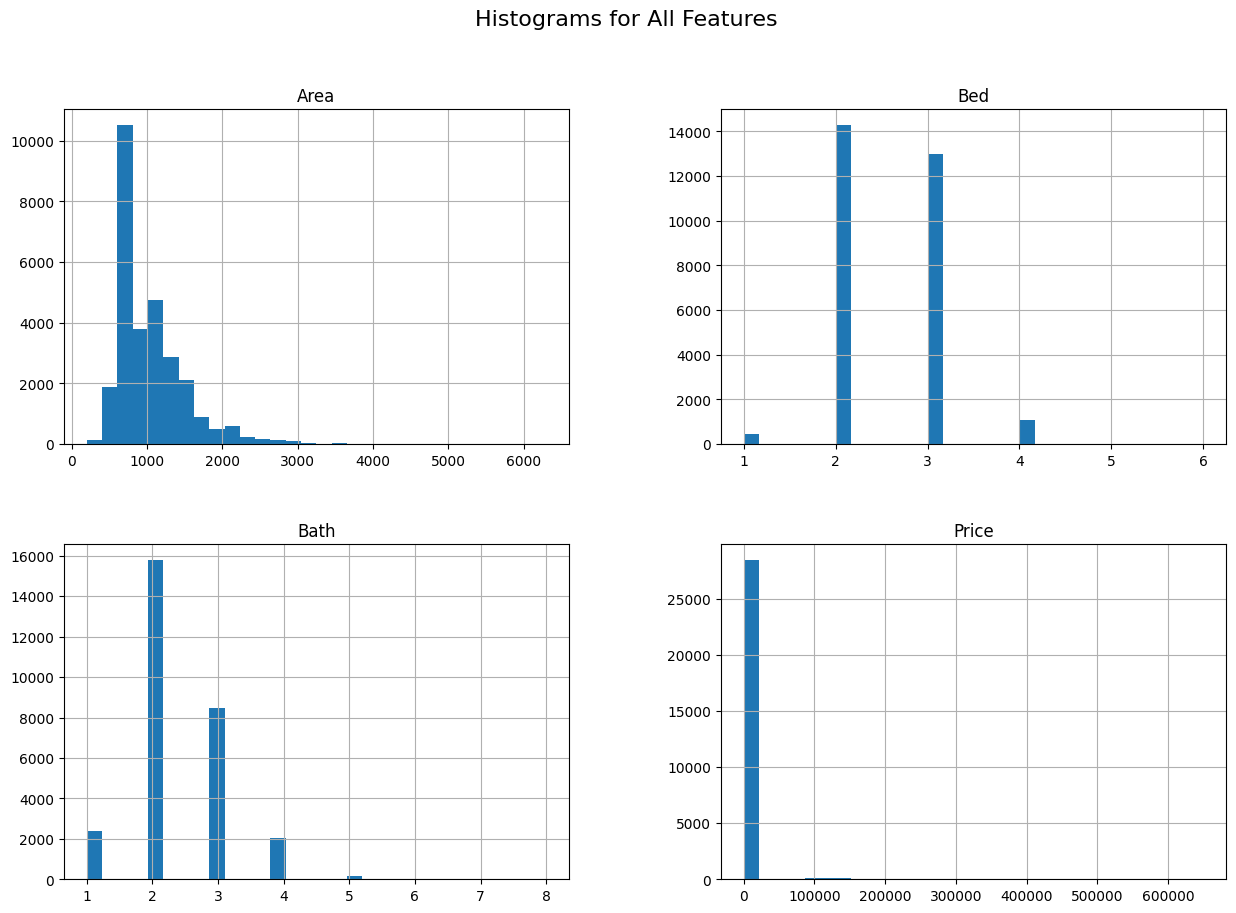

In [102]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for All Features', fontsize=16)
plt.show()


### Splitting Dataset

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']
# Train = 80% and Test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Encoding Location

In [ ]:
te = TargetEncoder(cols=['Location'])
# Fit encoder on train data
X_train['Location_encoded'] = te.fit_transform(X_train['Location'], y_train)

# Transform test data using the same encoder
X_test['Location_encoded'] = te.transform(X_test['Location'])
X_train = X_train.drop(columns=['Location'])
X_test = X_test.drop(columns=['Location'])


In [ ]:
X_train.head()

,Area,Bed,Bath,Location_encoded
19408,1400,3,3,37.923800
16254,900,2,2,1487.661789
24783,1750,3,4,33.080846
2412,2100,3,4,933.155342
24162,650,2,2,13.442943


## Model Building

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

### XG Boost

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

### Evalution Matrix

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

results = {}

def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2': r2}
    print(f"{model_name} --> RMSE: {rmse:.2f}, R2: {r2:.2f}")

evaluate(y_test, rf_preds, "Random Forest")
evaluate(y_test, xgb_preds, "XGBoost")
evaluate(y_test, lr_preds, "Linear Regression")
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"\nBest model based on RMSE: {best_model}")


Random Forest --> RMSE: 8796.60, R2: 0.79
XGBoost --> RMSE: 9433.56, R2: 0.76
Linear Regression --> RMSE: 13153.48, R2: 0.54

Best model based on RMSE: Random Forest


## Testing

In [ ]:
best_model = rf  # Random Forest Regressor
y_test_pred = best_model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test Results for Best Model:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


Test Results for Best Model:
RMSE: 8796.60
MAE: 881.34
R2 Score: 0.79


In [ ]:
import pandas as pd

def predict_price(model, encoder):
    # Take input from user
    location = input("Enter Location: ")
    area = float(input("Enter Area (sq ft): "))
    bed = int(input("Enter number of Bedrooms: "))
    bath = int(input("Enter number of Bathrooms: "))

    # Create a DataFrame for the input
    user_df = pd.DataFrame({
        'Location': [location],
        'Area': [area],
        'Bed': [bed],
        'Bath': [bath]
    })

    # Encode Location using the trained target encoder
    user_df['Location_encoded'] = encoder.transform(user_df['Location'])
    user_df = user_df.drop(columns=['Location'])

    # Predict Price
    prediction = model.predict(user_df)
    print(f"\n House Rent: {prediction[0]:.2f} Thousand")

# Example: using Random Forest and your trained TargetEncoder
predict_price(best_model, te)


Enter Location: Dhanmondi, 15
Enter Area (sq ft): 1100
Enter number of Bedrooms: 4
Enter number of Bathrooms: 2

 House Rent: 27.80 Thousand
